In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.getcwd()

'C:\\Users\\welcome\\Untitled Folder\\Machine Learning\\02.Logistic Regression'

In [4]:
titanic_train=pd.read_csv(r'C:\Users\welcome\Downloads\Titanic\train.csv')
titanic_test=pd.read_csv(r'C:\Users\welcome\Downloads\Titanic\test.csv')

In [5]:
titanic_test.shape

(418, 11)

In [6]:
titanic_train.shape

(891, 12)

In [7]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_train.info()
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [10]:
titanic_train.isna().sum()
titanic_test.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Figure size 1080x2880 with 0 Axes>

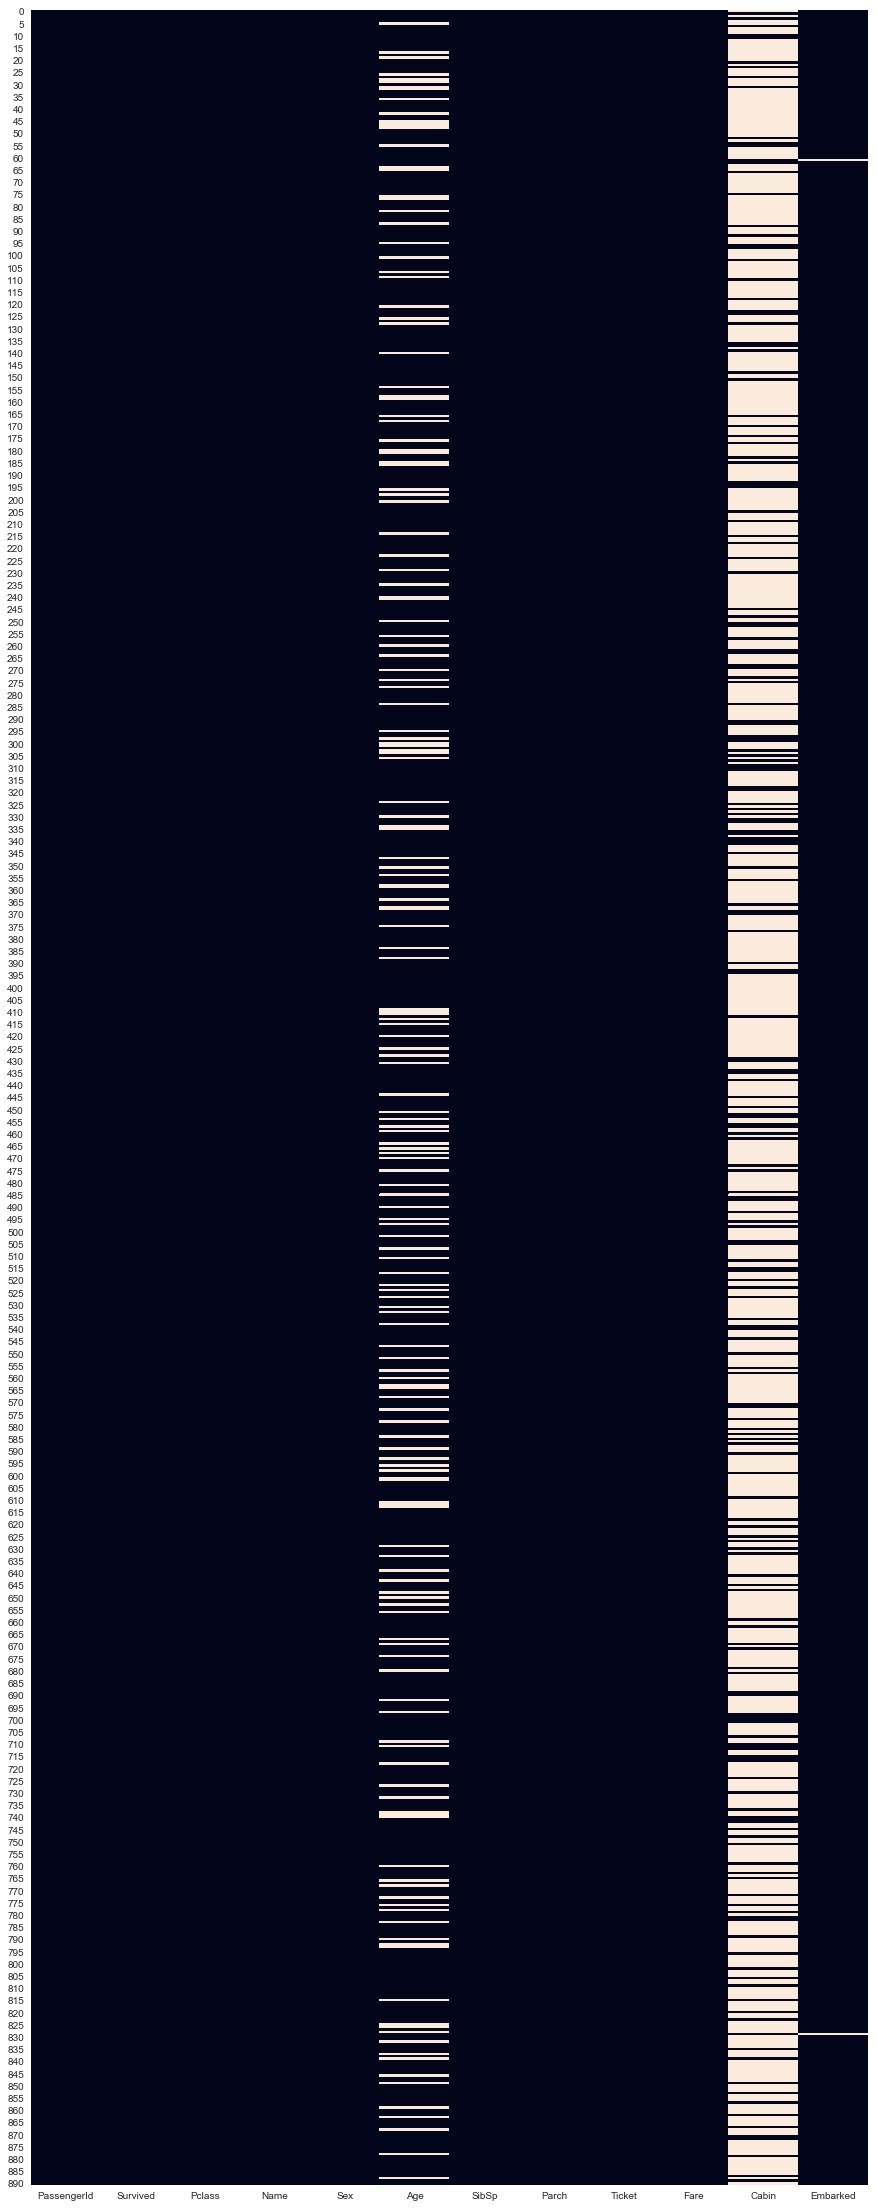

In [12]:
#heatmap
plt.figure(figsize=(15,40)) #increase the size to get the complete view of missing records in each columns
sns.heatmap(titanic_train.isna(),cbar=False,cmap=None)

In [13]:
Missing_data_per=((titanic_train.isna().sum() /len(titanic_train))*100).round(2)
Missing_data_per

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [14]:
#convert into str and %
Missing_data_per=Missing_data_per.astype('str')+'%'
Missing_data_per

PassengerId      0.0%
Survived         0.0%
Pclass           0.0%
Name             0.0%
Sex              0.0%
Age            19.87%
SibSp            0.0%
Parch            0.0%
Ticket           0.0%
Fare             0.0%
Cabin           77.1%
Embarked        0.22%
dtype: object

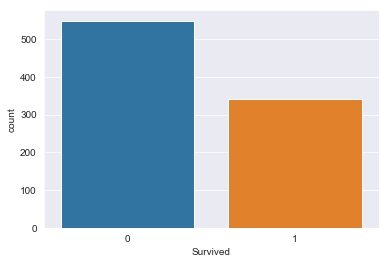

In [15]:
sns.countplot(x='Survived', data=titanic_train)

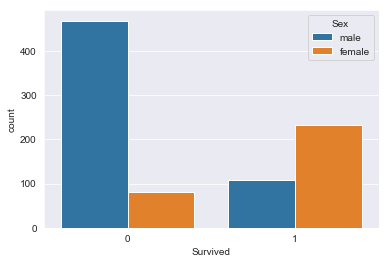

In [20]:
sns.countplot(x='Survived',hue='Sex', data=titanic_train)

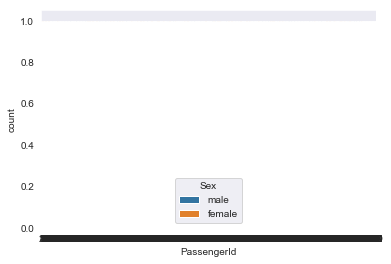

In [21]:
sns.countplot(x='PassengerId', data=titanic_train, hue='Sex')

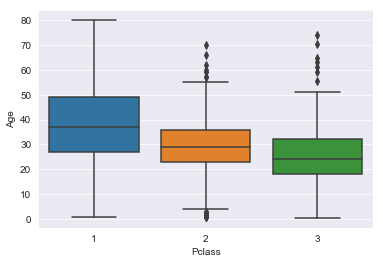

In [22]:
sns.boxplot(x='Pclass', y='Age', data=titanic_train)

In [23]:
titanic_train['Age'].isna().sum()
titanic_test['Age'].isna().sum()

177

86

In [22]:
#titanic_train['Age'].isna['Pclass']

In [24]:
titanic_train[titanic_train['Age'].isna()]['Pclass'].value_counts()
titanic_test[titanic_test['Age'].isna()]['Pclass'].value_counts()

3    136
1     30
2     11
Name: Pclass, dtype: int64

3    72
1     9
2     5
Name: Pclass, dtype: int64

In [25]:
missingdata_val=titanic_train.groupby('Pclass')['Age'].transform('mean') # try with np.mean inplace of tranform (will display all the means)
missingdata_val.head(5)
missingdata_val1=titanic_test.groupby('Pclass')['Age'].transform('mean') # try with np.mean inplace of tranform (will display all the means)
missingdata_val1.head(5)

0    25.140620
1    38.233441
2    25.140620
3    38.233441
4    25.140620
Name: Age, dtype: float64

0    24.027945
1    24.027945
2    28.777500
3    24.027945
4    24.027945
Name: Age, dtype: float64

In [26]:
titanic_train['Age'].fillna(missingdata_val,inplace=True)
titanic_test['Age'].fillna(missingdata_val1,inplace=True)

In [27]:
titanic_train['Age'].isna().sum()
titanic_test['Age'].isna().sum()

0

0

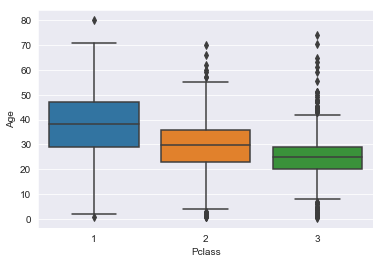

In [29]:
sns.boxplot(x='Pclass', y='Age', data=titanic_train)


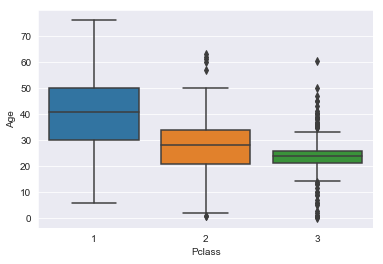

In [30]:
sns.boxplot(x='Pclass', y='Age', data=titanic_test)

In [31]:
titanic_train.head()
titanic_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
titanic_train.drop("Cabin",axis=1, inplace=True)
titanic_test.drop("Cabin",axis=1, inplace=True)

In [33]:
titanic_train[titanic_train['Embarked'].isna()]
titanic_test[titanic_test['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [34]:
titanic_train.dropna(inplace=True) #drop na from Embark

In [35]:
titanic_train[titanic_train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [37]:
titanic_train.isna().sum()
titanic_test.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [38]:
titanic_train.shape
titanic_test.shape

(889, 11)

(418, 10)

In [39]:
titanic_test[titanic_test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


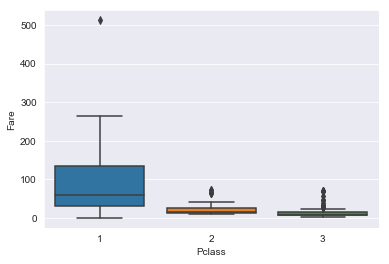

In [41]:
sns.boxplot(x='Pclass',y='Fare',data=titanic_test)

In [42]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,29.408289,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.964896,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,25.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,36.375000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [43]:
titanic_test[titanic_test['Fare'].isna()]['Pclass'].value_counts()

3    1
Name: Pclass, dtype: int64

In [44]:
missingdata=titanic_test.groupby('Pclass')['Fare'].transform('mean') # try with np.mean inplace of tranform (will display all the means)

In [45]:
titanic_test['Fare'].fillna(missingdata,inplace=True)

In [46]:
titanic_train['Fare'].isna().sum()

0

In [47]:
titanic_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [48]:
titanic_train_corr=titanic_train.corr()
titanic_train_corr.style.background_gradient(cmap='summer')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1,-0.00502832,-0.0353298,0.032411,-0.0576859,-0.00165658,0.0127032
Survived,-0.00502832,1,-0.335549,-0.0552781,-0.03404,0.0831508,0.25529
Pclass,-0.0353298,-0.335549,1,-0.400919,0.0816556,0.0168245,-0.548193
Age,0.032411,-0.0552781,-0.400919,1,-0.242737,-0.174818,0.11805
SibSp,-0.0576859,-0.03404,0.0816556,-0.242737,1,0.414542,0.160887
Parch,-0.00165658,0.0831508,0.0168245,-0.174818,0.414542,1,0.217532
Fare,0.0127032,0.25529,-0.548193,0.11805,0.160887,0.217532,1


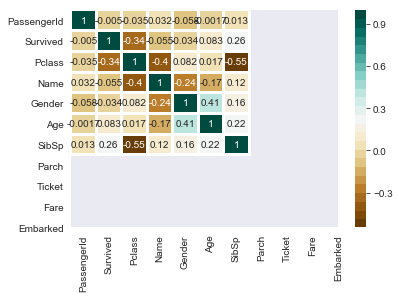

In [36]:
sns.heatmap(titanic_train_corr,xticklabels=titanic_train.columns,
            yticklabels=titanic_train.columns,annot=True,
            cmap=sns.color_palette("BrBG",25),linewidth=2);

In [52]:
titanic_test.shape
titanic_train.shape

(418, 10)

(889, 11)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [54]:
pd.get_dummies(titanic_train['Sex']).head()  #facilitates functionality drp _first=true
pd.get_dummies(titanic_test['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [55]:
pd.get_dummies(titanic_train['Sex'],drop_first=True).head(5)
pd.get_dummies(titanic_test['Sex'],drop_first=True).head(5)

,male
0,1
1,0
2,0
3,0
4,1


,male
0,1
1,0
2,1
3,1
4,0


In [56]:
pd.get_dummies(titanic_train['Embarked']).head(5)
pd.get_dummies(titanic_test['Embarked']).head(5)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [57]:
pd.get_dummies(titanic_train['Embarked'],drop_first=True).head(2)
pd.get_dummies(titanic_test['Embarked'],drop_first=True).head(2)

,Q,S
0,0,1
1,0,0


,Q,S
0,1,0
1,0,1


In [58]:
Gender=pd.get_dummies(titanic_train['Sex'],prefix='Sex',drop_first=True)
Embark=pd.get_dummies(titanic_train['Embarked'],prefix='Embarked',drop_first=True)

#titanic_train['Gender']=Gender
#titanic_train['Embarked']=Embarked
Gender_t=pd.get_dummies(titanic_test['Sex'],prefix='Sex',drop_first=True)
Embark_t=pd.get_dummies(titanic_test['Embarked'],prefix='Embarked',drop_first=True)

In [60]:
Embark.head(2)
Embark_t.head(2)

,Embarked_Q,Embarked_S
0,0,1
1,0,0


,Embarked_Q,Embarked_S
0,1,0
1,0,1


In [61]:
titanic_train=pd.concat([titanic_train,Gender,Embark],axis=1)
titanic_test=pd.concat([titanic_test,Gender_t,Embark_t],axis=1)

In [63]:
titanic_train.head()
titanic_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [64]:
titanic_train.drop(['Name','PassengerId','Sex','Ticket','Embarked'],axis=1, inplace=True)
titanic_test.drop(['Name','PassengerId','Sex','Ticket','Embarked'],axis=1, inplace=True)

In [68]:
titanic_train.head()
titanic_test.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [69]:
titanic_train.shape
titanic_test.shape

(889, 9)

(418, 8)

In [150]:
future_cols=['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']

In [151]:
X = titanic_train[future_cols]

In [152]:
Y= titanic_train['Survived'] 

In [153]:
X.shape

(889, 8)

In [154]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [155]:
Y.shape

(889,)

In [157]:
future_cols1=['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']
X_test=titanic_test[future_cols1]

In [158]:
from sklearn.linear_model import LogisticRegression 

logmodel=LogisticRegression()
logmodel.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [186]:
#generate predictions
predictions_train=logmodel.predict(X)
predictions_test=logmodel.predict(X_test)

In [187]:
logmodel.intercept_

array([4.07581934])

In [188]:
logmodel.coef_

array([[-0.87827389, -0.03023145, -0.30034712, -0.07386736,  0.00448285,
        -2.46359012,  0.01864221, -0.23130947]])

In [189]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [190]:
X.shape

(889, 8)

In [191]:
X_test.shape

(418, 8)

In [192]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(titanic_train.drop('Survived',axis=1), 
                                                    titanic_train['Survived'], test_size=0.47, 
                                                    random_state=101)

In [193]:
x_test.shape

(418, 8)

In [194]:
y_test.shape

(418,)

In [195]:
#Evaluation of model

from sklearn.metrics import roc_curve,auc,confusion_matrix, \
classification_report,accuracy_score

In [196]:
print(classification_report(Y,predictions_train))
print("Accuracy:",accuracy_score(Y,predictions_train))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       549
           1       0.77      0.69      0.73       340

   micro avg       0.80      0.80      0.80       889
   macro avg       0.79      0.78      0.79       889
weighted avg       0.80      0.80      0.80       889

Accuracy: 0.8020247469066367


In [197]:
print(classification_report(y_test,predictions_test))
print("Accuracy:",accuracy_score(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.60      0.62      0.61       259
           1       0.35      0.34      0.35       159

   micro avg       0.51      0.51      0.51       418
   macro avg       0.48      0.48      0.48       418
weighted avg       0.51      0.51      0.51       418

Accuracy: 0.5119617224880383


In [198]:
# compute confusion matrix
cnf_matrix=confusion_matrix(y_true=Y,y_pred=predictions_train)
cm=pd.DataFrame(cnf_matrix)
cm

,0,1
0,480,69
1,107,233


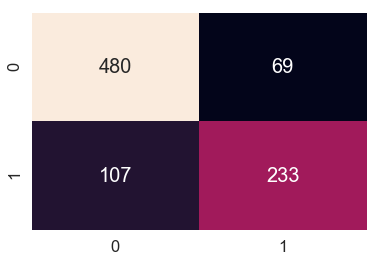

In [199]:
sns.set(font_scale=1.5) # for label size
sns.heatmap(cm,annot=True, fmt='g',annot_kws={"size":20},cbar=False) 

In [200]:
FPR,TPR, _=roc_curve(Y,predictions_train)
FPR1,TPR1, _1=roc_curve(y_test,predictions_test)

In [201]:
#calculate the AUC

roc_auc=auc(FPR,TPR)
print('ROC AUC : %0.3f'% roc_auc)

roc_auc1=auc(FPR1,TPR1)
print('ROC AUC: %0.3f'% roc_auc1)

ROC AUC : 0.780
ROC AUC: 0.479


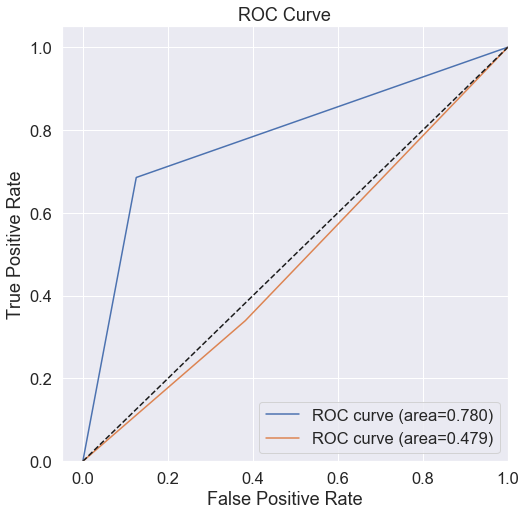

In [202]:
#plot of a ROC curve
plt.figure(figsize=(8,8))
plt.plot(FPR,TPR, label='ROC curve (area=%0.3f)'% roc_auc)
plt.plot(FPR1,TPR1, label='ROC curve (area=%0.3f)'% roc_auc1)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show();